<a href="https://colab.research.google.com/github/bayuryunarko/Machine-Learning/blob/main/ML_K_Means_and_Fuzzy_C_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering with K-Means and Fuzzy C-Means Algorithm

##Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from seaborn import scatterplot as scatter
import sys 
sys.path.insert(0, 'FuzzyCN')
# from fcmeans import FCM


In [2]:
!pip install fuzzy-c-means

In [3]:
from fcmeans import FCM

## Contoh K-Means sederhana

In [4]:
X = np.array([[1], [2], [3], [6], [7], [8]])

In [5]:
km = KMeans(n_clusters=2).fit(X)

In [6]:
print(f'Centroid : {km.cluster_centers_}')
print(f'Kelompok data : {km.labels_}')

Centroid : [[2.]
 [7.]]
Kelompok data : [0 0 0 1 1 1]


##Load dataset from sklearn

In [11]:
iris = datasets.load_iris()

X = iris.data[:, :4]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

##Find the number of cluster for K-Means

In [12]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

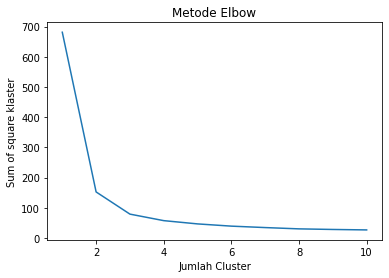

In [13]:
# Plot Metode Elbow
plt.plot(range(1,11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Sum of square klaster')
plt.show()

Metode Elbow mengikuti bentuk siku pada tangan. Sehingga apabila kita ingin mendapatkan jumlah cluster yang tepat pada data adalah dengan melihat lekukan sebelum mencapai grafik yang landai. Sehingga jumlah cluster yang dipilih adalah nilai 3.

##Fit Model K-Means

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

##Cluster visualization and Plotting Centroid Cluster

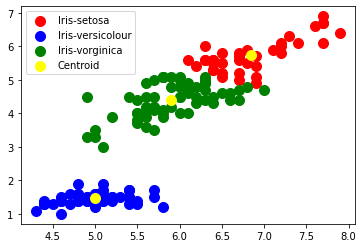

In [17]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,2], s=100, c='red', label='Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,2], s=100, c='blue', label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,2], s=100, c='green', label='Iris-vorginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=100, c='yellow', label='Centroid')
plt.legend()
plt.show()

##Fuzzy C-Means

In [19]:
# m atau kerapatan anggota adalah 2
fcm = FCM(n_clusters=3, max_iter=1000, m=2, error=0.005)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_label = fcm.u.argmax(axis=1)

In [23]:
print(fcm_centers)
print(fcm_label)

[[5.8884273  2.760888   4.363216   1.3969351 ]
 [6.774402   3.0522056  5.6460238  2.0532534 ]
 [5.0039654  3.4141128  1.482775   0.25352803]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


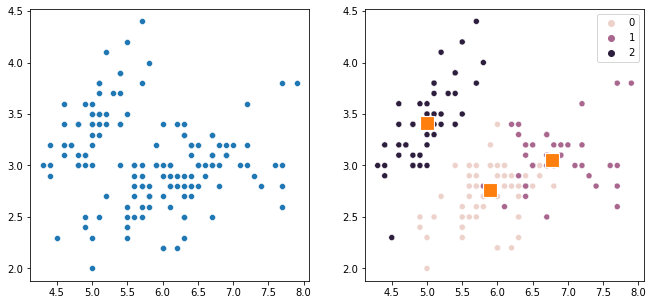

In [26]:
# Plot Result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_label)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1], marker='s', s=200)
plt.show()

In [27]:
# m atau kerapatan anggota adalah 9
fcm = FCM(n_clusters=3, max_iter=1000, m=9, error=0.005)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_label = fcm.u.argmax(axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


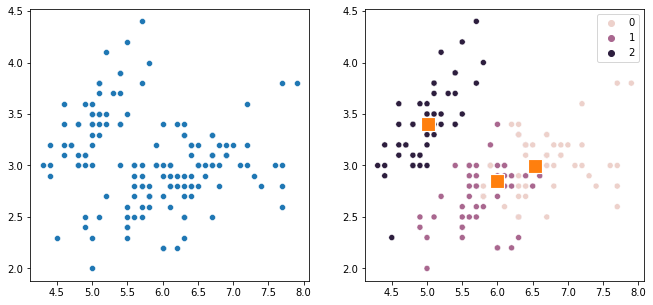

In [28]:
# Plot Result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_label)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1], marker='s', s=200)
plt.show()